# IMPLEMENTING PCA USING LOGISTIC REGRESSION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

LOAD THE DATA

In [4]:
df = pd.read_csv("C:\MACHINE LEARNING\EDA AND FEATURE ENGINEERING\ENDURE WORK\demos\DATA\heart_disease_uci.csv")

EXPLORE THE DATA

In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

DROP THE NULL VALUES

In [8]:
df = df.dropna()


In [9]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

DROP THE ID COLUMN

In [11]:
df = df.drop("id", axis=1)

In [12]:

x_data = df.drop("num", axis=1)
y_data = df["num"]

ONE HOT ENCODING TO CONVERT THE CATEGORICAL COLUMNS INTO NUMERICAL COLUMNS

In [13]:
x_data = pd.get_dummies(x_data, drop_first=True)


SPLIT THE DATA INTO TRAINING AND TEST

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)


BEFORE PCA

In [16]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [17]:
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(scaled_x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred_before = logistic_reg.predict(scaled_x_test)
acc_before = accuracy_score(y_test, y_pred_before)

In [20]:
print("Accuracy BEFORE PCA:", acc_before)
print("\nClassification Report BEFORE PCA:\n", classification_report(y_test, y_pred_before))


Accuracy BEFORE PCA: 0.5666666666666667

Classification Report BEFORE PCA:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.20      0.09      0.12        11
           2       0.00      0.00      0.00         7
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.26      0.29      0.27        60
weighted avg       0.50      0.57      0.53        60



APPLY PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
X_train_pca = pca.fit_transform(scaled_x_train)
X_test_pca = pca.transform(scaled_x_test)

AFTER PCA

In [23]:
logistic_reg_pca = LogisticRegression(max_iter=1000)
logistic_reg_pca.fit(X_train_pca, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_pred_after = logistic_reg_pca.predict(X_test_pca)
acc_after = accuracy_score(y_test, y_pred_after)

In [25]:
print("Accuracy AFTER PCA (2 PCs):", acc_after)
print("\nClassification Report AFTER PCA:\n", classification_report(y_test, y_pred_after))


Accuracy AFTER PCA (2 PCs): 0.6

Classification Report AFTER PCA:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.38      0.27      0.32        11
           2       0.17      0.14      0.15         7
           3       0.22      0.29      0.25         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.31      0.33      0.32        60
weighted avg       0.55      0.60      0.57        60



c:\MACHINE LEARNING\EDA AND FEATURE ENGINEERING\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\MACHINE LEARNING\EDA AND FEATURE ENGINEERING\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\MACHINE LEARNING\EDA AND FEATURE ENGINEERING\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

VISUALIZATION

In [26]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

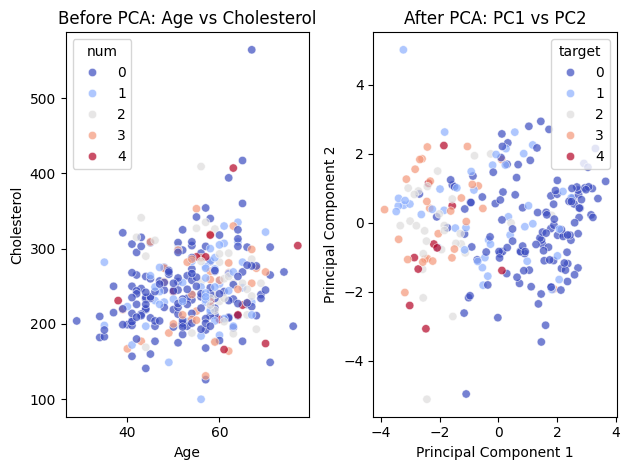

In [27]:
plt.subplot(1,2,1)
sns.scatterplot(x=df["age"], y=df["chol"], hue=df["num"], palette="coolwarm", alpha=0.7)
plt.title("Before PCA: Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")

pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])
pca_df["target"] = y_train.values

plt.subplot(1,2,2)
sns.scatterplot(x="PC1", y="PC2", hue="target", palette="coolwarm", data=pca_df, alpha=0.7)
plt.title("After PCA: PC1 vs PC2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [28]:
print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))


Explained variance ratio (PC1, PC2): [0.19928642 0.10090552]
Total variance captured: 0.3001919417583666
